> # **To classify the passenger (whether they survived or not) we have to do the following step for the better understanding**

* Exploring the data 
* Exploratory data Analysis
* Decision Making(feature extraction and feature selection)
* Data Cleaning & Missing data handling 
* Preparing the Data
* Machine learning model

 >  >  **DONT FORGET TO UPVOTE THE NOTEBOOK** 

**Important libraries for data visualization , data analysis and classification**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import sklearn.

In [2]:
train = pd.read_csv("../input/titanic/train.csv",index_col=False) #calling the training data
test=pd.read_csv("../input/titanic/test.csv",index_col=False) #calling the test data 
dataset=[train,test] # merging the train and test data into dataset variable 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


By seeing the info 
**Now we knew some important thing** 
1.  As we can see there are null values in Cabin and Age

2.  Our data have different types values 

    * {PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare} -> are numerical
    
    * {Name,Sex,Ticket,Cabin,Embarked} -> are categorical
    
3. Some feature are unnecessary like 

    * {PassengerID -> because it doesnot mean anything
    
    * {Name -> it doesnot mean anything untill and unlees there is a title in it 
    
    * {Ticket -> itself it object dtype but we will convert it to numerical and find the pattern 
    
    * {Cabin -> most of the values are null (that means they dont have separate cabin )


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> # **Describing the Numerical Data**

In [5]:
train.describe(exclude=["O"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> **NOTE:**
> *    Parch means -> number of parents / children aboard the Titanic
> *    SibSp means -> Number of Siblings / Spouses Aboard

> # **Describe the Categorical Data**

In [6]:
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


as we can see the Ticket feature have dublicate values that means there is some sort of pattern in it !!


> # **EDA**

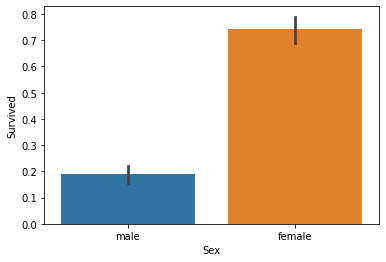

In [7]:
sns.barplot(data=train,x="Sex",y="Survived")
men=train[train["Sex"]=="male"]["Sex"].count()
survived_men=train[(train["Sex"]=="male")&(train["Survived"]==1)]["Sex"].count()
women=train[train["Sex"]=="female"]["Sex"].count()
women_survived=train[(train["Sex"]=="female")& (train["Survived"]==1)]["Sex"].count()

In [8]:
print("the ratio of men that are survived",str(round(survived_men*100/men,2)))
print("the ratio of men that are survived",str(round(women_survived*100/women,2)))

the ratio of men that are survived 18.89
the ratio of men that are survived 74.2


**as we can Sex feature is really important because women have higher ratio of survival**

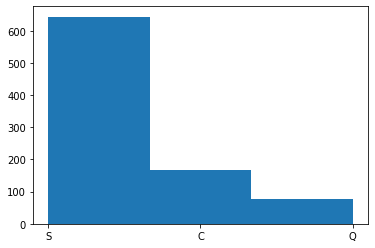

In [9]:
plt.hist(train.loc[train["Embarked"].notnull(),"Embarked"],bins=3)   
plt.show()

**As we see the values of Embarked are mostly fall in S category**

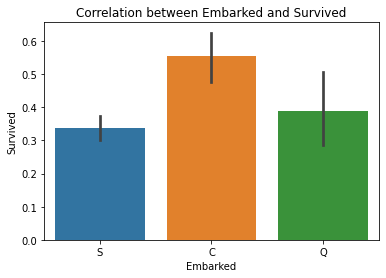

In [10]:
sns.barplot(data=train,x="Embarked",y="Survived")
plt.title("Correlation between Embarked and Survived")
plt.show()

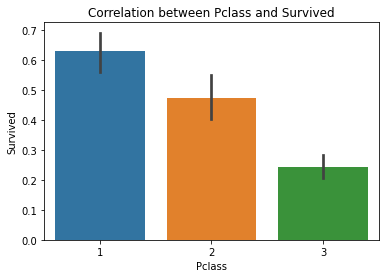

In [11]:
sns.barplot(data=train,x="Pclass",y="Survived")
plt.title("Correlation between Pclass and Survived")
plt.show()

> *Thus both Pclass and Embarked are correlated to survive*

In [12]:
train["Category_feature"]=pd.qcut(train["Fare"],4) #divide the fare Columns into 4 equal sized bins
train["Category_feature"].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Category_feature, dtype: int64

In [13]:
for data in dataset:
    data["Fare"]=data["Fare"].fillna(data["Fare"].median())
    data.loc[data["Fare"] <= 7.91 , "Fare" ]=0
    data.loc[(data["Fare"] > 7.91) & (data["Fare"] < 14.454),"Fare"]=1
    data.loc[(data["Fare"] > 14.454) & (data["Fare"] <= 31.0),'Fare']=2
    data.loc[(data["Fare"] > 31.0),"Fare"]=3
    data["Fare"]=data["Fare"].astype(int)

In [14]:
train["Fare"]=train["Fare"].astype(int)
test["Fare"].unique()

array([0, 1, 2, 3])

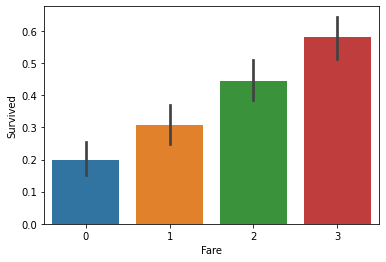

In [15]:
sns.barplot(data=train,x="Fare",y="Survived")
plt.show()

**As we clearly see the Fare is highly correlated to Survived** (*more fare rate have highly chances of survival*)


In [16]:
for data in dataset:
    avg_age=data["Age"].mean() #calculating the mean value  
    avg_std=data["Age"].std() #calculating the standard darivation
    age_null_count=data["Age"].isnull().sum() # finding how many null values are present 
    null_values=np.random.randint(avg_age-avg_std,avg_age+avg_std,size=age_null_count) # by using the random int we initialize the random value in range of mean and standard darivation 
    data["Age"][np.isnan(data["Age"])]=null_values 
    data["Age"]=data["Age"].astype(int)# converting the value in int 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**handling the missing values is Age feature**

In [17]:
train["Category_age"]=pd.qcut(train["Age"],5)

**Age feature is divided into 5 equal size bin**

In [18]:
for data in dataset:
    data.loc[data["Age"] <= 19.0,"Age"]=0    
    data.loc[(data["Age"] > 19) & (data["Age"] <= 25),"Age"]=1
    data.loc[(data["Age"] > 25) & (data["Age"] <= 31),"Age" ]=2
    data.loc[(data["Age"] > 31) & (data["Age"] <= 40),"Age" ]=3
    data.loc[(data["Age"] > 40) & (data["Age"] <= 80),"Age" ]=4

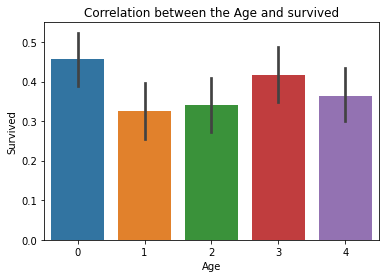

In [19]:
sns.barplot(data=train,x="Age",y="Survived")
plt.title("Correlation between the Age and survived")
plt.show()

In [20]:
train[["Parch","Survived"]].groupby('Parch',as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [21]:
train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


> **both SibSp and Parch is related to each other, either he\she is travelling alone or with Family**    

In [22]:
for data in dataset:
    data["Family_size"]=data["SibSp"] + data["Parch"] + 1
dataset[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category_feature,Category_age,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,NaN,S,"(-0.001, 7.91]","(19.0, 25.0]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,3,C85,C,"(31.0, 512.329]","(32.0, 40.0]",2
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,1,NaN,S,"(7.91, 14.454]","(25.0, 32.0]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,3,C123,S,"(31.0, 512.329]","(32.0, 40.0]",2
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,1,NaN,S,"(7.91, 14.454]","(32.0, 40.0]",1


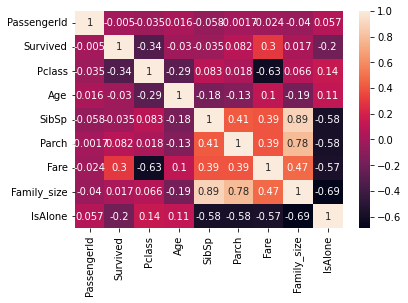

In [23]:
for data in dataset:
    data["IsAlone"]=0
    data.loc[data["Family_size"]==1,'IsAlone']=1
sns.heatmap(train.corr(),annot=True)
plt.show()

> **if the family_Size is 1 that means a person is travelling alone**

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category_feature,Category_age,Family_size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,NaN,S,"(-0.001, 7.91]","(19.0, 25.0]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,3,C85,C,"(31.0, 512.329]","(32.0, 40.0]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,1,NaN,S,"(7.91, 14.454]","(25.0, 32.0]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,3,C123,S,"(31.0, 512.329]","(32.0, 40.0]",2,0
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,1,NaN,S,"(7.91, 14.454]","(32.0, 40.0]",1,1


> **converting the Ticket feature into numerical form to identify the pattern in it**

In [25]:
train["ticket_type"]=train["Ticket"].apply(lambda x:x[:3])
train["ticket_type"]=train["ticket_type"].astype("category")
train["ticket_type"]=train["ticket_type"].cat.codes

In [26]:
test["ticket_type"]=test["Ticket"].apply(lambda x:x[:3])
test["ticket_type"]=test["ticket_type"].astype("category")
test["ticket_type"]=test["ticket_type"].cat.codes

In [27]:
for data in dataset:
    data["Embarked"]=data["Embarked"].fillna("S")

**Handling the missing value**

In [28]:
train["Has_Cabin"]=train["Cabin"].apply(lambda x:0 if type(x)==float else 1)
test["Has_Cabin"]=train["Cabin"].apply(lambda x:0 if type(x)==float else 1)

**we will see who has Cabin**

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category_feature,Category_age,Family_size,IsAlone,ticket_type,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,NaN,S,"(-0.001, 7.91]","(19.0, 25.0]",2,0,124,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,3,C85,C,"(31.0, 512.329]","(32.0, 40.0]",2,0,137,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,1,NaN,S,"(7.91, 14.454]","(25.0, 32.0]",1,1,148,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,3,C123,S,"(31.0, 512.329]","(32.0, 40.0]",2,0,3,1
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,1,NaN,S,"(7.91, 14.454]","(32.0, 40.0]",1,1,97,0


In [30]:
for data in dataset:
    data["Sex"]=data["Sex"].map({"male":1,"female":0})

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category_feature,Category_age,Family_size,IsAlone,ticket_type,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,S,"(-0.001, 7.91]","(19.0, 25.0]",2,0,124,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,3,C85,C,"(31.0, 512.329]","(32.0, 40.0]",2,0,137,1
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,1,NaN,S,"(7.91, 14.454]","(25.0, 32.0]",1,1,148,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,3,C123,S,"(31.0, 512.329]","(32.0, 40.0]",2,0,3,1
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,1,NaN,S,"(7.91, 14.454]","(32.0, 40.0]",1,1,97,0


In [32]:
import re

**As we know by EDA that female have higher ratio of survival and in the Name feature there are titles in it** *(doing extraction of title from Name column)*

In [33]:
def title_seacrh(name):
    title_search=re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ""


In [34]:
for data in dataset:
    data["title"]=data["Name"].apply(title_seacrh)

In [35]:
dataset[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category_feature,Category_age,Family_size,IsAlone,ticket_type,Has_Cabin,title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,S,"(-0.001, 7.91]","(19.0, 25.0]",2,0,124,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,3,C85,C,"(31.0, 512.329]","(32.0, 40.0]",2,0,137,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,1,NaN,S,"(7.91, 14.454]","(25.0, 32.0]",1,1,148,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,3,C123,S,"(31.0, 512.329]","(32.0, 40.0]",2,0,3,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,1,NaN,S,"(7.91, 14.454]","(32.0, 40.0]",1,1,97,0,Mr


In [36]:
for data in dataset:
    data["title"].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],"Rare",inplace=True)
    data["title"].replace({"Mlle":"Miss","Mme":"Miss","Ms":"Mrs"},inplace=True)

In [37]:
dataset[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category_feature,Category_age,Family_size,IsAlone,ticket_type,Has_Cabin,title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,S,"(-0.001, 7.91]","(19.0, 25.0]",2,0,124,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,3,C85,C,"(31.0, 512.329]","(32.0, 40.0]",2,0,137,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,1,NaN,S,"(7.91, 14.454]","(25.0, 32.0]",1,1,148,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,3,C123,S,"(31.0, 512.329]","(32.0, 40.0]",2,0,3,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,1,NaN,S,"(7.91, 14.454]","(32.0, 40.0]",1,1,97,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,2,0,0,211536,1,NaN,S,"(7.91, 14.454]","(25.0, 32.0]",1,1,23,0,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,0,112053,2,B42,S,"(14.454, 31.0]","(-0.001, 19.0]",1,1,2,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,4,1,2,W./C. 6607,2,NaN,S,"(14.454, 31.0]","(40.0, 80.0]",4,0,150,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,2,0,0,111369,2,C148,C,"(14.454, 31.0]","(25.0, 32.0]",1,1,1,1,Mr


In [38]:
title_mapping={"Mr":1,"Mrs":2,"Miss":3,"Master":4,"Rare":5}

In [39]:
for data in dataset:
    data['title']=data["title"].map(title_mapping)

In [40]:
dataset[1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,IsAlone,ticket_type,Has_Cabin,title
0,892,3,"Kelly, Mr. James",1,3,0,0,330911,0,NaN,Q,1,1,58,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,4,1,0,363272,0,NaN,S,2,0,71,1,2
2,894,2,"Myles, Mr. Thomas Francis",1,4,0,0,240276,1,NaN,Q,1,1,32,0,1
3,895,3,"Wirz, Mr. Albert",1,2,0,0,315154,1,NaN,S,1,1,55,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,3101298,1,NaN,S,3,0,54,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,1,0,0,A.5. 3236,1,NaN,S,1,1,96,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,3,0,0,PC 17758,3,C105,C,1,1,107,0,5
415,1307,3,"Saether, Mr. Simon Sivertsen",1,3,0,0,SOTON/O.Q. 3101262,0,NaN,S,1,1,113,0,1
416,1308,3,"Ware, Mr. Frederick",1,1,0,0,359309,1,NaN,S,1,1,70,0,1


> **Now we will be dropping the useless feature**

In [41]:
useless_feature=["Name","Ticket","Cabin"]

In [42]:
for data in dataset:
    data.drop(useless_feature,axis=1,inplace=True)

In [43]:
train.drop(["PassengerId","Category_feature","Category_age"],axis=1,inplace=True)


In [44]:
for data in dataset:
    data["Embarked"]=data["Embarked"].map({"S":1,"Q":2,"C":3})

In [45]:
dataset[1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone,ticket_type,Has_Cabin,title
0,892,3,1,3,0,0,0,2,1,1,58,0,1
1,893,3,0,4,1,0,0,1,2,0,71,1,2
2,894,2,1,4,0,0,1,2,1,1,32,0,1
3,895,3,1,2,0,0,1,1,1,1,55,1,1
4,896,3,0,1,1,1,1,1,3,0,54,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,0,1,1,1,1,96,0,1
414,1306,1,0,3,0,0,3,3,1,1,107,0,5
415,1307,3,1,3,0,0,0,1,1,1,113,0,1
416,1308,3,1,1,0,0,1,1,1,1,70,0,1


# **ML MODEL**

In [46]:
import xgboost 
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

In [47]:
classifer=xgboost.XGBClassifier(
objective= 'binary:logistic',
max_depth= 4,
gamma=0.9
)

In [48]:
X=train.drop("Survived",axis=1)

In [49]:
y=train["Survived"].ravel()

In [50]:
test1=test.drop("PassengerId",axis=1)

In [51]:
classifer.fit(X,y)

[21:04:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
classifer.predict(test1)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# **SUBMISSION**

In [53]:
PassengerId=test["PassengerId"]

In [54]:
my_submission=pd.DataFrame({"PassengerId":PassengerId,"Survived":classifer.predict(test1)})

In [55]:
my_submission.to_csv("my_submission.csv",index=False)